# **Servo Prediction using Liner Regression**

# **Get Understanding about Data set**

**What is Servo:** In control engineering a servomechanism, usually shortened to servo, is an automatic device that uses error-sensing negative feedback to correct the action of a mechanism. On displacement-controlled applications, it usually includes a built-in encoder or other position feedback mechanism to ensure the output is achieving the desired effect. The term correctly applies only to systems where the feedback or error-correction signals help control mechanical position, speed, attitude or any other measurable variables. For example, an automotive power window control is not a servomechanism, as there is no automatic feedback that controls position-the operator does this by observation. By contrast a car's cruise control uses closed-loop feedback, which classifies it as a servomechanism.

A data frame with 167 observations on 5 variables, 4 nominal and 1 as the target class. This data set is from a simulation of a servo system involving a servo amplifier, a motor, a lead screw/nut, and a sliding carriage of some sort. It may have been on of the translational axes of a robot on the 9th floor of the Al lab. In any case, the output value is almost certainly a rise time, or the time required for the system to respond to a step change in a position set point. The variables that describe the data set and their values are the following:

1.Motor A,B,C,D,E

2.Screw A,B,C,D,E

3.Pgain 3,4,5,6

4.Vgain 1,2,3,4,5

****

# **Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

# **Import Data**

In [3]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

In [4]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [7]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [8]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [9]:
df.shape

(167, 5)

# **Categories and counts of Categories Variables**

In [10]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [19]:
df[['Screw']].value_counts()

Screw
0        42
1        35
2        31
3        30
4        29
Name: count, dtype: int64

In [20]:
df.replace({'Motor': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4 }}, inplace=True)

In [21]:
df.replace({'Screw': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4 }}, inplace=True)

# **Define Target variable (y) and Feature Variables(x)**

In [27]:

y = df['Class']
x = df[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [28]:
x.shape, y.shape

((167, 4), (167,))

# **Train Test Split**

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3 ,random_state=2529)

In [31]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((116, 4), (51, 4), (116,), (51,))

# **Modeling**

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model_selection = LinearRegression()

# **Model Evaluation**

In [34]:
model_selection.fit(x_train,y_train)

LinearRegression()

# **Prediction**

In [35]:
y_pred = model_selection.predict(x_test)

In [36]:
y_pred.shape

(51,)

# **Accuracy**

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
mean_squared_error(y_test,y_pred)

66.03589175595563

In [39]:
mean_absolute_error(y_test,y_pred)

7.190539677251235

In [40]:
r2_score(y_test,y_pred)

0.6807245170563927

# **Visualization of Actual Vs predicted result**

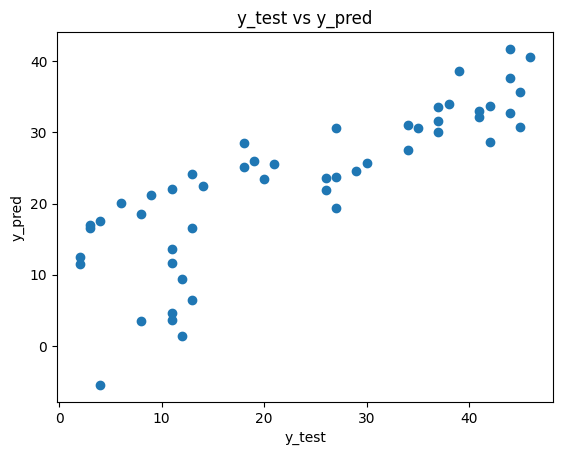

In [41]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("y_test vs y_pred")
plt.show()

# **Get Future Predictions**

In [42]:
x_new=df.sample()

In [43]:
x_new

,Motor,Screw,Pgain,Vgain,Class
118,4,0,4,2,26


In [44]:
x_new.shape

(1, 5)

In [45]:
x_new=x_new.drop(['Class'],axis=1)

In [47]:
x_new

,Motor,Screw,Pgain,Vgain
118,4,0,4,2


In [46]:
x_new.shape

(1, 4)

In [48]:
y_pred_new=model_selection.predict(x_new)

In [49]:
y_pred_new

array([21.92598051])